In [93]:
pip install moviepy SpeechRecognition SQLAlchemy pysoundfile pydub wordcloud nltk

Note: you may need to restart the kernel to use updated packages.


In [102]:
import moviepy.editor as mp
import speech_recognition as sr
import wave
import os
import speech_recognition as sr
import soundfile as sf
from pydub import AudioSegment
import io
import tempfile
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
from gensim import corpora
from gensim.models import LdaModel
import string

nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Denys\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Denys\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

In [7]:
video_path = 'C:/Users/Denys/Downloads/Quais foram os maiores heróis do Brasil.mp4'  # Substitua pelo caminho do seu vídeo

video = mp.VideoFileClip(video_path)
audio = video.audio
audio_path = 'Quais foram os maiores heróis do Brasil.wav'  # Caminho para salvar o áudio temporariamente
audio.write_audiofile(audio_path)

MoviePy - Writing audio in Quais foram os maiores heróis do Brasil.wav


MoviePy - Done.


In [18]:
def split_wav(file_path, chunk_size):
    # Cria uma pasta para armazenar os arquivos divididos
    output_folder = 'arquivos_divididos'
    os.makedirs(output_folder, exist_ok=True)

    # Abre o arquivo de áudio para leitura em modo binário
    with open(file_path, 'rb') as file:
        file_number = 1
        current_chunk_size = 0
        current_chunk_data = b''

        # Lê o arquivo em chunks até atingir o tamanho máximo
        while True:
            chunk = file.read(chunk_size)
            
            # Verifica se chegou ao final do arquivo
            if not chunk:
                break

            # Verifica se o chunk atual excede o tamanho máximo
            if current_chunk_size + len(chunk) > chunk_size:
                # Salva o chunk atual em um novo arquivo
                output_file_path = os.path.join(output_folder, f'chunk{file_number}.wav')
                with open(output_file_path, 'wb') as output_file:
                    output_file.write(current_chunk_data)

                # Incrementa o número do arquivo
                file_number += 1
                current_chunk_size = 0
                current_chunk_data = b''

            # Atualiza o chunk atual e o tamanho atual
            current_chunk_data += chunk
            current_chunk_size += len(chunk)

        # Salva o último chunk em um novo arquivo
        output_file_path = os.path.join(output_folder, f'chunk{file_number}.wav')
        with open(output_file_path, 'wb') as output_file:
            output_file.write(current_chunk_data)

    print('Arquivo dividido com sucesso!')

# Exemplo de uso
wav_file_path = audio_path
chunk_size_bytes = 10 * 1024 * 1024  # 10MB em bytes

split_wav(wav_file_path, chunk_size_bytes)

Arquivo dividido com sucesso!


In [89]:
# Caminho para o arquivo WAV
audio_path = 'C:/Users/Denys/Documents/TCC/python/arquivos_divididos/chunk1.wav'

# Ler o arquivo WAV usando a biblioteca soundfile
data, sample_rate = sf.read(audio_path)

# Criar um arquivo temporário para armazenar os dados do arquivo WAV
with tempfile.NamedTemporaryFile(delete=False, suffix='.wav') as tmp_wav:
    tmp_wav_path = tmp_wav.name
    sf.write(tmp_wav_path, data, sample_rate, format='WAV')

# Inicializar o reconhecedor de fala
r = sr.Recognizer()

# Transcrição do áudio
with sr.AudioFile(tmp_wav_path) as source:
    audio_data = r.record(source)

    # Realizar o reconhecimento de fala
    text = r.recognize_google(audio_data, language='pt-BR')  # Substitua pelo idioma do seu áudio

    # Imprimir o texto transcrito
    print(text)

Bom dia sempre me perguntam Quais foram os melhores momentos da história do Brasil quem foram as principais figuras I love isso daí daria uma uma exposição mais longa né então vou daqui apenas é uma pincelada tão grande momento do Brasil foi a vinda dos Jesuítas para cá né Portugal então tanto pela carta de Pero Vaz de Caminha como pelo documento de 1549 desenha então que Portugal queria Então converter os índios né e aquilo ali não ficou em Marabá de fato eles enviaram pra cá os Jesuítas que começaram um trabalho de evangelização gigantesco né Além disso além de converter os índios também fundaram cidades fundaram um monte de escolas


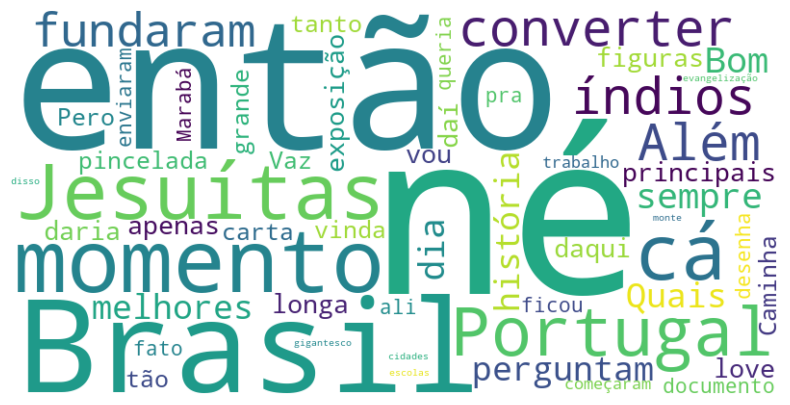

In [99]:
stopwords_portuguese = set(stopwords.words('portuguese'))

palavras = text.split()
palavras_sem_stopwords = [palavra for palavra in palavras if palavra.lower() not in stopwords_portuguese]
texto_sem_stopwords = ' '.join(palavras_sem_stopwords)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_sem_stopwords)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [103]:
stemmer = RSLPStemmer()
stopwords = set(stopwords.words('portuguese'))
punctuation = set(string.punctuation)
tokens = word_tokenize(text.lower())
tokens = [stemmer.stem(token) for token in tokens if token not in stopwords and token not in punctuation]

dictionary = corpora.Dictionary([tokens])
corpus = [dictionary.doc2bow(tokens)]

lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary)

topic = lda_model.print_topics(num_topics=1, num_words=5)[0]
topic_words = topic[1]

print(topic_words)

Tópico Principal:
0.039*"né" + 0.039*"ent" + 0.024*"índi" + 0.024*"jesuít" + 0.024*"brasil"
